In this notebook we will compare the MBR scores calculated with the monte-carlo estimates and those from the predictive model
We will try to analyse failure points and think about how to tackle those.



In [1]:
# Some setup code for imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from custom_datasets.BayesRiskDatasetLoader import BayesRiskDatasetLoader


In [2]:

# First we will load the test set with the calculated scores.
dataset_loader = BayesRiskDatasetLoader("validation_predictive", n_hypotheses=100, n_references=1000, sampling_method='ancestral')
dataset = dataset_loader.load(type="pandas")

In [3]:
# We will visualize the scores as



In [4]:
import numpy as np
def calculate_mbr_scores(entry, n_references=1000):
    scores = []
    count = np.sum(entry["utilities_count"])
    for hyp, util in zip(entry["hypotheses"], entry["utilities"]):
        score = np.sum(util* entry["utilities_count"])/count
        scores.append(score)
    return scores

In [5]:
entry_id=5
entry = dataset.data.iloc[entry_id]
scores = calculate_mbr_scores(entry)

print(scores)

[0.976936238013208, 1.0442413221094757, 1.0434949790239334, 0.4977993944268674, 1.0243594698756933, 0.7273990536890924, 0.5783227259870618, -1.04294151699543, 0.6881924784816802, 0.7469194515123964]


In [6]:
### Next up we will read the trained model and calculate the score given by the heads
from models.pl_predictive.PLPredictiveModelFactory import PLPredictiveModelFactory
path = "C:/Users/gerso/FBR/predictive/tatoeba-de-en/models/temp_mixture_model/"
model, factory = PLPredictiveModelFactory.load(path)

C:\Users\gerso\FBR\NMT/tatoeba-de-en/model
1.001726887106992e-06
using a mixture model


In [8]:

wrapped_model = GaussianMixtureMBRModel(model)

In [9]:
from tqdm import tqdm
all_scores = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])
    print(len(hypotheses))
    scores = wrapped_model.get_scores([source]* len(hypotheses), hypotheses).tolist()
    all_scores.append(scores)
    
    if i > 200:
        break


  0%|                                                                                                                                                                                                              | 0/2500 [00:00<?, ?it/s]

11


C:\Users\gerso\AppData\Local\Temp/ipykernel_11680/2735966921.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  result = {k: torch.tensor(v) for k, v in result.items()}
  0%|                                                                                                                                                                                                    | 1/2500 [00:04<2:59:30,  4.31s/it]

14
6
4
100


  0%|▍                                                                                                                                                                                                     | 5/2500 [00:04<28:22,  1.47it/s]

10
23
8
93


  0%|▋                                                                                                                                                                                                     | 9/2500 [00:04<13:59,  2.97it/s]

5
20
11
100


  1%|█▎                                                                                                                                                                                                   | 16/2500 [00:05<06:40,  6.20it/s]

12
4
50
95


  1%|█▍                                                                                                                                                                                                   | 18/2500 [00:05<06:28,  6.39it/s]

95
96


  1%|█▌                                                                                                                                                                                                   | 20/2500 [00:05<05:57,  6.94it/s]

2
3
18
85


  1%|██                                                                                                                                                                                                   | 26/2500 [00:05<04:06, 10.04it/s]

9
16
100


  1%|██▏                                                                                                                                                                                                  | 28/2500 [00:06<03:58, 10.36it/s]

4
98
98


  1%|██▌                                                                                                                                                                                                  | 32/2500 [00:06<03:52, 10.60it/s]

2
8
96


  1%|██▊                                                                                                                                                                                                  | 36/2500 [00:06<02:57, 13.90it/s]

10
2
7
58
100


  2%|███▏                                                                                                                                                                                                 | 41/2500 [00:06<02:32, 16.07it/s]

12
20
1
20
100


  2%|███▍                                                                                                                                                                                                 | 43/2500 [00:07<03:05, 13.22it/s]

34
18
91


  2%|███▋                                                                                                                                                                                                 | 47/2500 [00:07<03:10, 12.88it/s]

4
95
3
9
6
2


  2%|████                                                                                                                                                                                                 | 52/2500 [00:07<02:15, 18.02it/s]

61
10
100


  2%|████▍                                                                                                                                                                                                | 56/2500 [00:08<02:42, 15.08it/s]

89
4
68


  2%|████▌                                                                                                                                                                                                | 58/2500 [00:08<02:36, 15.61it/s]

4
100
100


  2%|████▋                                                                                                                                                                                                | 60/2500 [00:08<03:47, 10.73it/s]

100


  2%|████▉                                                                                                                                                                                                | 62/2500 [00:08<04:22,  9.29it/s]

99
29
100


  3%|█████▏                                                                                                                                                                                               | 66/2500 [00:09<03:47, 10.72it/s]

96
1
11
3
12
40


  3%|█████▋                                                                                                                                                                                               | 72/2500 [00:09<03:00, 13.46it/s]

33
95


  3%|█████▊                                                                                                                                                                                               | 74/2500 [00:09<02:54, 13.94it/s]

2
74
51
99


  3%|██████▏                                                                                                                                                                                              | 79/2500 [00:09<03:01, 13.36it/s]

6
8
100


  3%|██████▍                                                                                                                                                                                              | 81/2500 [00:10<03:10, 12.72it/s]

100
10
59
92


  3%|██████▋                                                                                                                                                                                              | 85/2500 [00:10<03:35, 11.22it/s]

9
100
3
93


  3%|██████▊                                                                                                                                                                                              | 87/2500 [00:10<03:26, 11.71it/s]

4
31
4
100


  4%|███████▎                                                                                                                                                                                             | 93/2500 [00:11<03:06, 12.91it/s]

11
69
93


  4%|███████▍                                                                                                                                                                                             | 95/2500 [00:11<03:42, 10.81it/s]

97
18
23


  4%|███████▊                                                                                                                                                                                            | 100/2500 [00:11<02:55, 13.67it/s]

4
9
85
98


  4%|███████▉                                                                                                                                                                                            | 102/2500 [00:11<03:06, 12.85it/s]

4
9
16
3
98


  4%|████████▌                                                                                                                                                                                           | 110/2500 [00:12<02:11, 18.23it/s]

20
2
13
19
6
100


  5%|████████▊                                                                                                                                                                                           | 113/2500 [00:12<02:24, 16.55it/s]

5
95
89


  5%|█████████▎                                                                                                                                                                                          | 118/2500 [00:12<02:39, 14.94it/s]

41
14
41
67


  5%|█████████▍                                                                                                                                                                                          | 120/2500 [00:12<02:37, 15.10it/s]

5
12
99


  5%|█████████▋                                                                                                                                                                                          | 124/2500 [00:13<02:54, 13.65it/s]

3
96
28
10


  5%|█████████▉                                                                                                                                                                                          | 127/2500 [00:13<02:29, 15.85it/s]

36
100
100


  5%|██████████                                                                                                                                                                                          | 129/2500 [00:13<03:18, 11.94it/s]

8
7
98


  5%|██████████▌                                                                                                                                                                                         | 134/2500 [00:14<02:52, 13.70it/s]

5
61
9
100


  6%|██████████▉                                                                                                                                                                                         | 140/2500 [00:14<02:10, 18.13it/s]

32
9
6
5
30
3
90


  6%|███████████▍                                                                                                                                                                                        | 146/2500 [00:14<01:59, 19.71it/s]

9
7
38
6
17
32


  6%|███████████▋                                                                                                                                                                                        | 149/2500 [00:14<01:48, 21.74it/s]

31
25
75


  6%|███████████▉                                                                                                                                                                                        | 152/2500 [00:14<02:08, 18.33it/s]

70
5
81


  6%|████████████▏                                                                                                                                                                                       | 155/2500 [00:15<02:38, 14.81it/s]

67
99


  6%|████████████▎                                                                                                                                                                                       | 157/2500 [00:15<03:12, 12.20it/s]

100
50


  6%|████████████▌                                                                                                                                                                                       | 161/2500 [00:15<03:17, 11.82it/s]

16
70
32
10
6


  7%|████████████▉                                                                                                                                                                                       | 165/2500 [00:16<02:27, 15.81it/s]

45
86


  7%|█████████████                                                                                                                                                                                       | 167/2500 [00:16<02:35, 14.99it/s]

6
100
69


  7%|█████████████▌                                                                                                                                                                                      | 173/2500 [00:16<02:13, 17.49it/s]

8
1
8
29
4
14
6
11
20


  7%|██████████████▎                                                                                                                                                                                     | 183/2500 [00:16<01:21, 28.26it/s]

4
5
8
8
18
8
14
21
4


  8%|██████████████▋                                                                                                                                                                                     | 188/2500 [00:16<01:14, 31.03it/s]

18
27
73
44


  8%|███████████████                                                                                                                                                                                     | 192/2500 [00:17<01:30, 25.48it/s]

12
98
5


  8%|███████████████▎                                                                                                                                                                                    | 195/2500 [00:17<01:44, 22.12it/s]

1
24
45
100


  8%|███████████████▌                                                                                                                                                                                    | 198/2500 [00:17<02:07, 18.01it/s]

4
96
79


  8%|███████████████▊                                                                                                                                                                                    | 201/2500 [00:17<03:24, 11.23it/s]

7


In [10]:
print(len(all_scores[10]))

20


In [11]:
import matplotlib.pyplot as plt
def clean(s):
    return s.replace('?', '')

def compare_scores(source, target, hypotheses, monte_carlo_scores, predicted_scores, max_show=15, labels=("Monte Carlo", "predicted"), colors=("b", "r"), save=False):
    
    # First we sort based on scores 1
    #First we show the 
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    
    sorted_indices = np.argsort(-monte_carlo_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]


    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on Monte-Carlo: \n {} \n {}'.format(source, target))
    ax.legend()
    
    fig.tight_layout()
    
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "monte_carlo"), bbox_inches="tight")
    
    plt.show()
   
    
    sorted_indices = np.argsort(-predicted_scores)
    
    monte_carlo_1_sorted = monte_carlo_scores[sorted_indices][:max_show]
    predicted_scores_1_sorted = predicted_scores[sorted_indices][:max_show]
    hypotheses_sorted = hypotheses[sorted_indices][:max_show]
    
    
    plt.rcdefaults()
    fig, ax = plt.subplots()
        
    
    y_pos = np.arange(len(hypotheses_sorted))
    
    width=0.35

    ax.barh(y_pos - width/2, monte_carlo_1_sorted, width, align='center', color=colors[0], label=labels[0])
    ax.barh(y_pos + width/2, predicted_scores_1_sorted, width, align='center', color=colors[1], label=labels[1])
    
    ax.set_yticks(y_pos, labels=hypotheses_sorted)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('scores')
    ax.set_title('MBR scores sorted on predicted: \n {} \n {}'.format(source, target))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}_{}_{}.png'.format(cleaned_source, cleaned_target, "predictive"))
    plt.show()

In [12]:
def compare_random_scores(data, predictive_scores, n_examples=5, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(all_scores), size=n_examples)
    
    for i in indices:
        entry = data.iloc[i]
        compare_scores(entry["source"], entry["target"], np.array(entry["hypotheses"]),   np.array(calculate_mbr_scores(entry)), np.array(all_scores[i]), labels=["Monte carlo", 'predicted'], save=True)
    
    

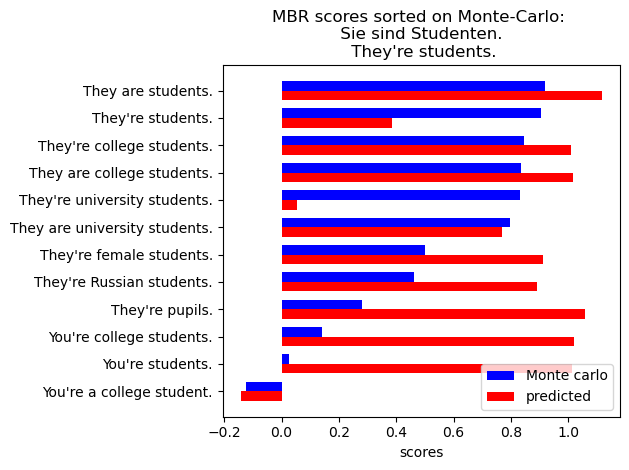

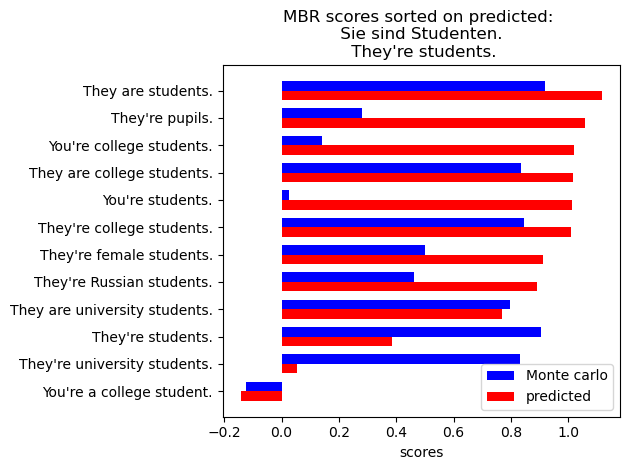

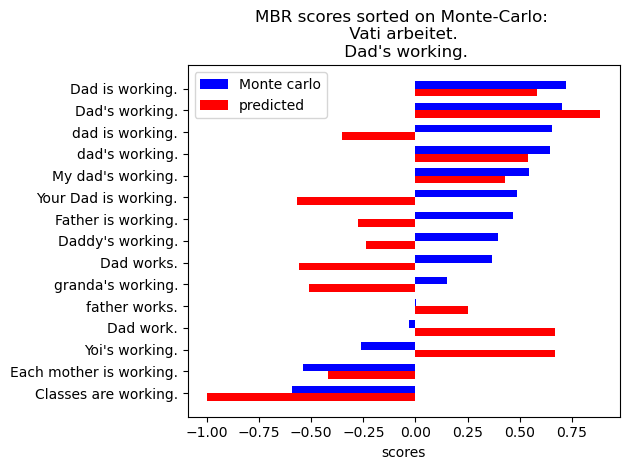

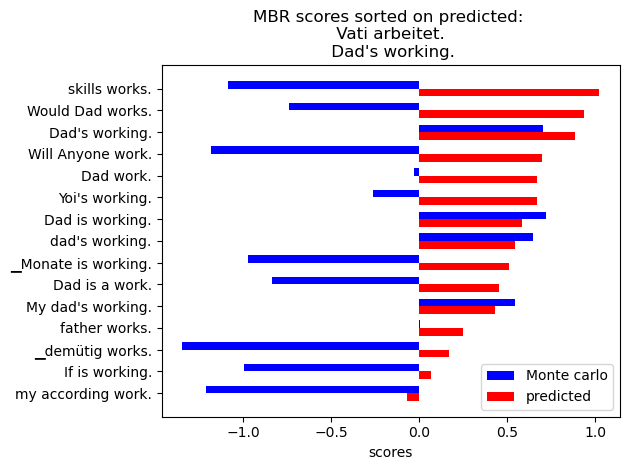

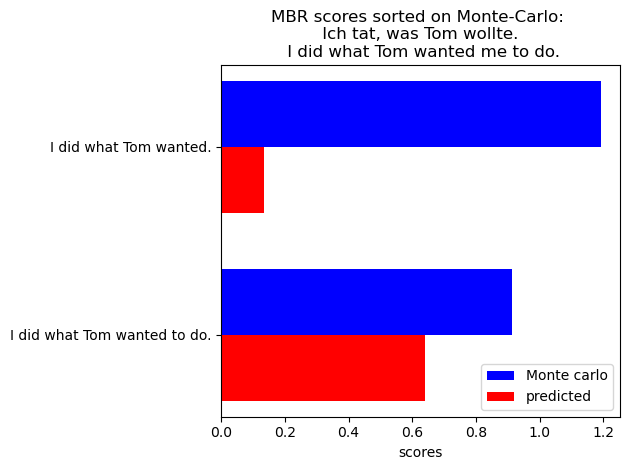

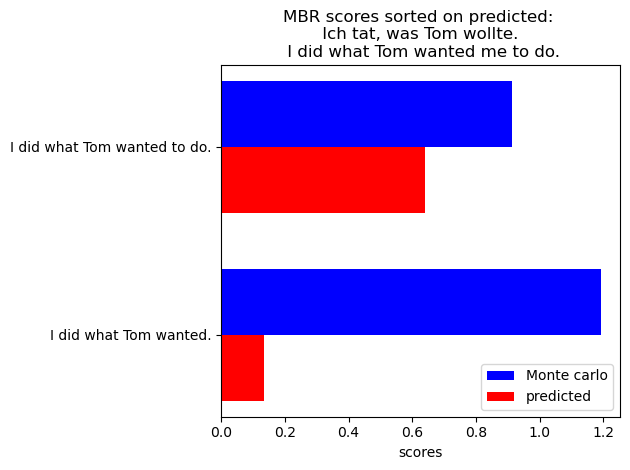

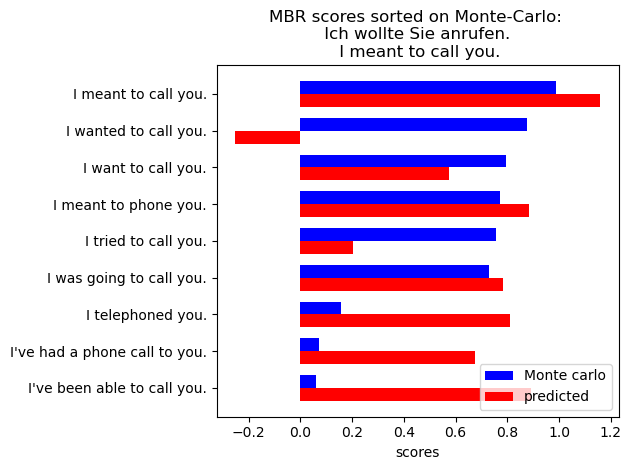

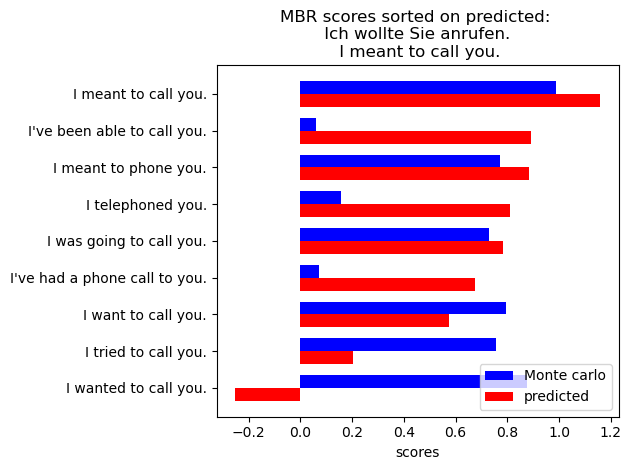

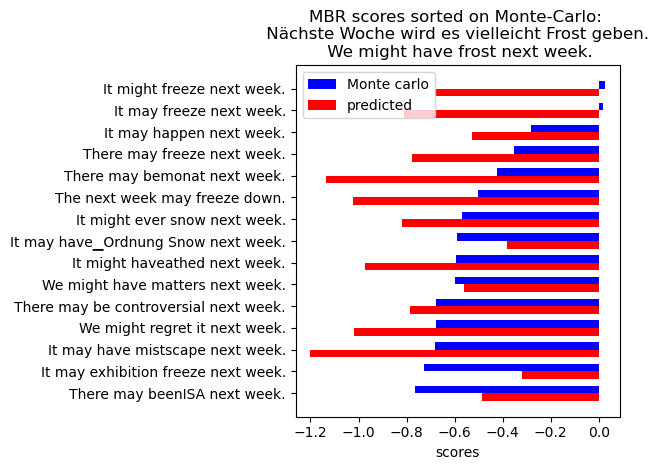

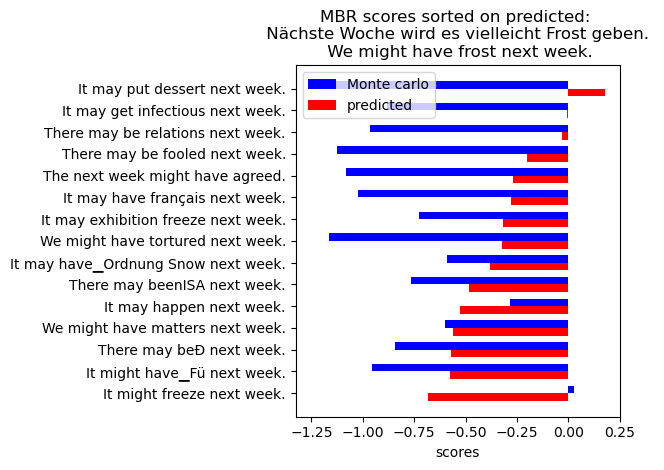

In [13]:
compare_random_scores(dataset.data, all_scores)

In [14]:
reference_scores = []
for i, row in dataset.data.iterrows():
    reference_scores.append(np.array(calculate_mbr_scores(row)))


In [15]:
## Next up we check if we are optimistic or pessimistic.

def calc_opt_statistics(predicted_scores, reference_scores):
    opt_count = 0
    pes_count = 0
    opt_sum = 0
    pes_sum = 0
    for pred_score, ref_score in zip(predicted_scores, reference_scores):
        larger = pred_score >= ref_score
        smaller = ref_score > pred_score
        opt_count += sum(larger)
        pes_count += sum(smaller)
        opt_sum += sum((pred_score - ref_score) * larger)
        pes_sum += sum((ref_score - pred_score) * smaller)
    total = opt_count + pes_count
    opt_percentage = opt_count/total
    pes_percentage = pes_count/total
    opt_avg = opt_sum/opt_count
    pes_avg = pes_sum/pes_count
        
    return {"opt_count": opt_count, "pes_count": pes_count, 
            "opt_sum": opt_sum, "pes_sum": pes_sum,
            "opt_percentage": opt_percentage,
            "pes_percentage": pes_percentage,
            "opt_avg": opt_avg,
            "pes_avg": pes_avg,
           }


In [16]:
statistics = calc_opt_statistics(all_scores, reference_scores)

In [17]:
statistics

{'opt_count': 4347,
 'pes_count': 3718,
 'opt_sum': 2006.0262220563893,
 'pes_sum': 1602.4485051481347,
 'opt_percentage': 0.5389956602603844,
 'pes_percentage': 0.46100433973961563,
 'opt_avg': 0.4614737110780744,
 'pes_avg': 0.4309974462474811}

In [18]:
### Here we get the predicted loc and scale for each sentence:
from tqdm import tqdm
all_model_out = []
for i, row in tqdm(dataset.data.iterrows(), total=dataset.data.shape[0]):
    source = row["source"]
    hypotheses = list(row["hypotheses"])

    model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
    all_model_out.append(model_out)
    if i > 200:
        break


  8%|███████████████▊                                                                                                                                                                                    | 201/2500 [00:11<02:07, 18.02it/s]


In [19]:
def get_repeated_utils(utilities, count):
    
    repeated_utils = []
    for util in utilities:
        
        r = []
        for u, c in zip(util, count):
            r += [u] * c
        repeated_utils.append(r)
    return repeated_utils
    
    

In [20]:
# def Gauss(x, A, B):
#     y = A*np.exp(-1*B*x**2)
#     return y
import torch.distributions as td
import torch
def show_gaussian_mix(loc, scale, data, source, target, hypothesis, save=False, path='./imgs/'):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    
    cleaned_source = clean(source)
    cleaned_target = clean(target)
    cleaned_hypothesis = clean(hypothesis)
    
    # First plot the histogram
    ax.hist(data, 250, density=True, facecolor='g', alpha=0.75, label="scores")
    
    # Next up we plot the gaussian we tried to fit

    dists = []
    for l, s in zip(loc, scale):
        
        dist = td.Normal(l, s)
    
    
        x = torch.Tensor(np.linspace(l - 2* s, l + 2 * s, 100))
        probs = np.exp(dist.log_prob(x))
        ax.plot(x, probs, label="Predicted fit: \nLoc: {}, Scale: {}".format(str(round(l, 2)), str(round(s, 2))))
    
      
    middle_point = int(len(probs)/2)
    avg = np.mean(data)
    ax.scatter(avg, probs[middle_point], label="avg: {}".format(str(round(avg, 2))), marker="o")
    
   
    
    ax.set_xlabel('scores')
    ax.set_title('MBR scores histogram with Gaussian: \n {} \n {}'.format(source, hypothesis))
    ax.legend()
    fig.tight_layout()
    if save:
        plt.savefig('{}fitted_gaussian_{}_{}.png'.format(path, cleaned_source, cleaned_hypothesis))
    
    plt.show()



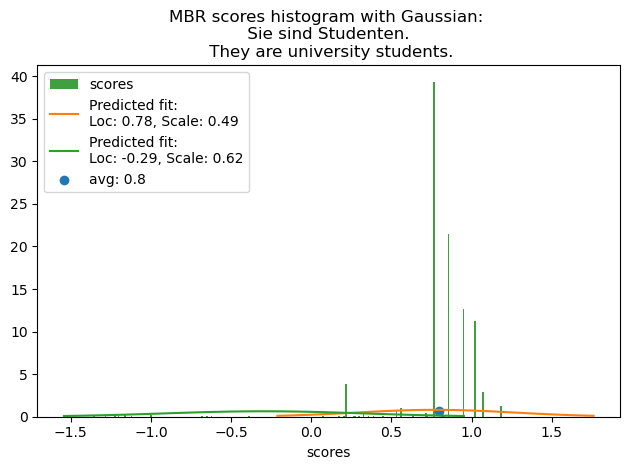

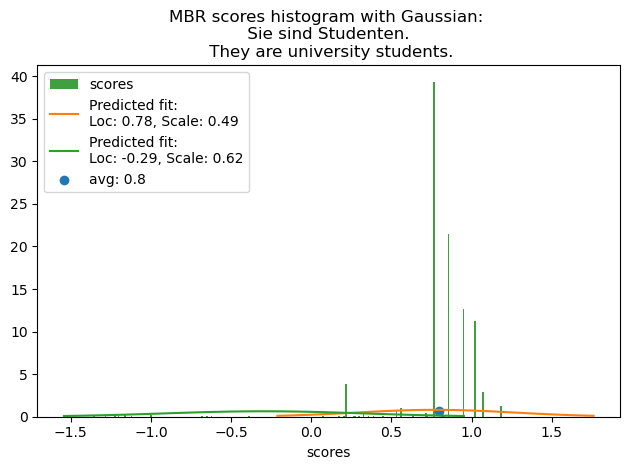

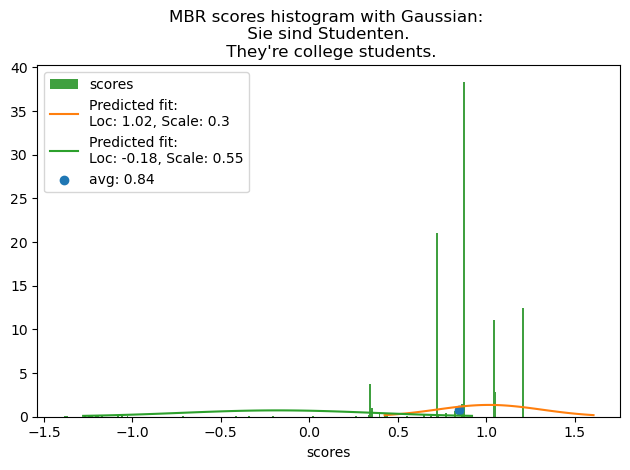

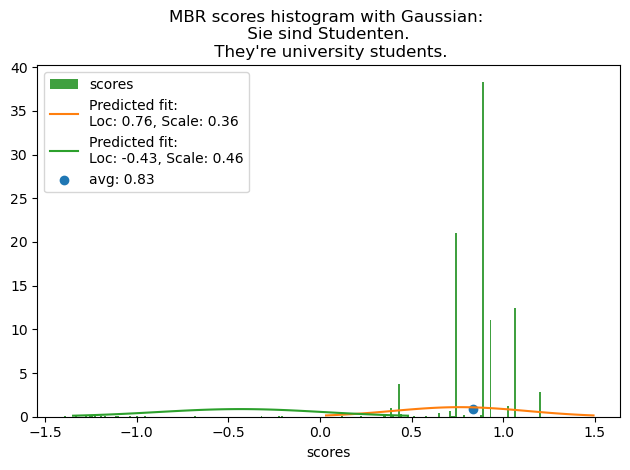

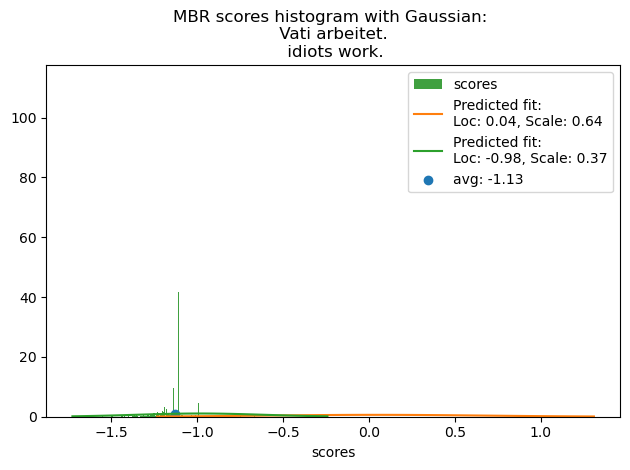

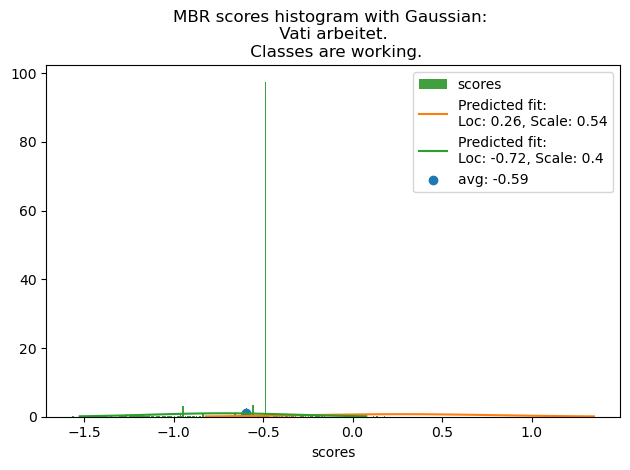

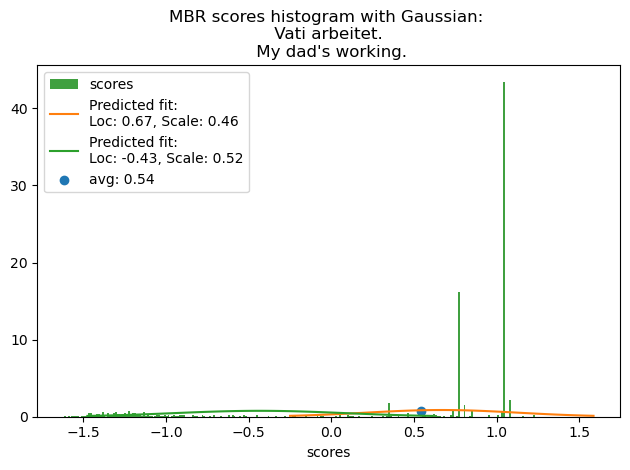

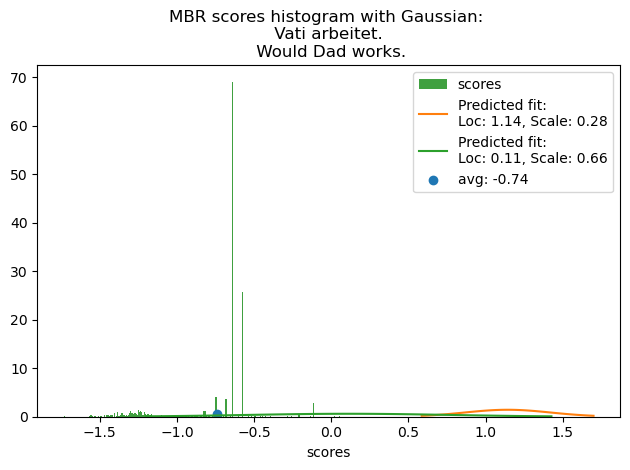

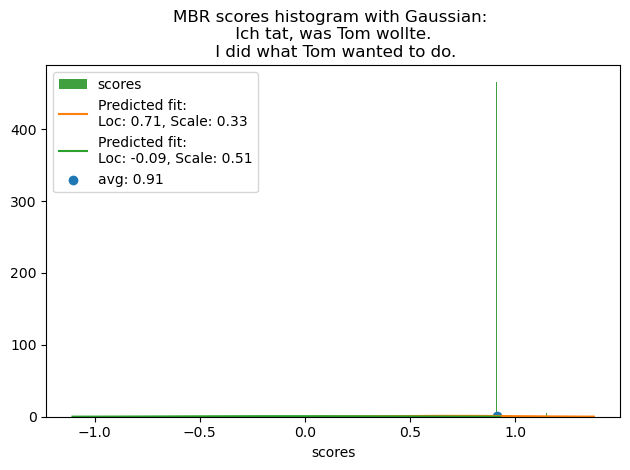

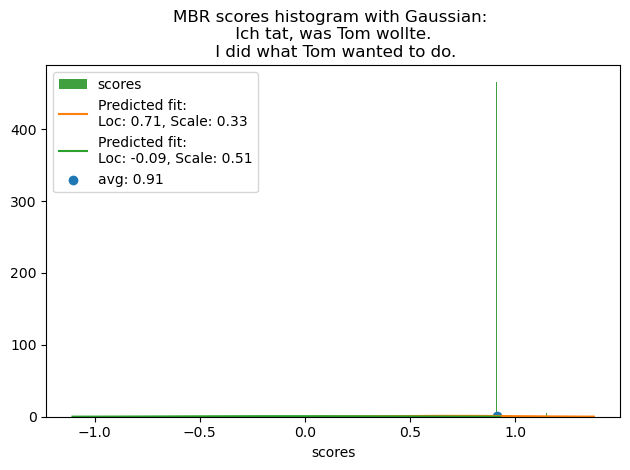

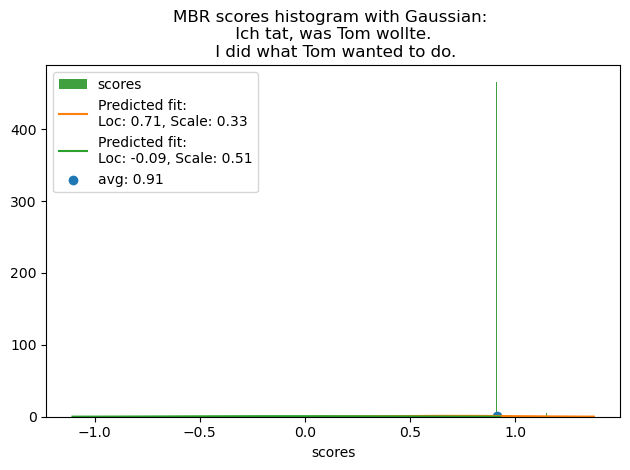

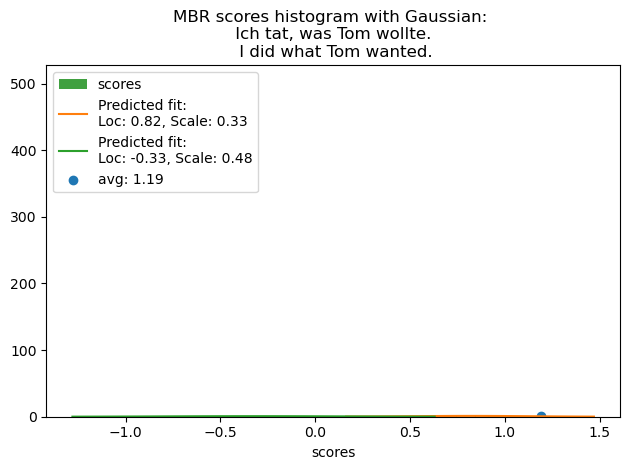

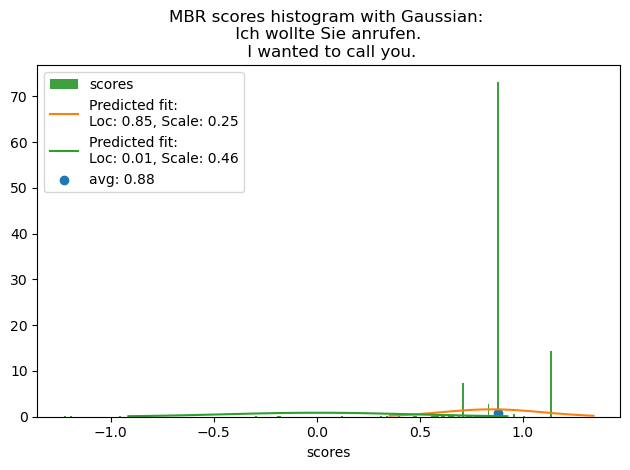

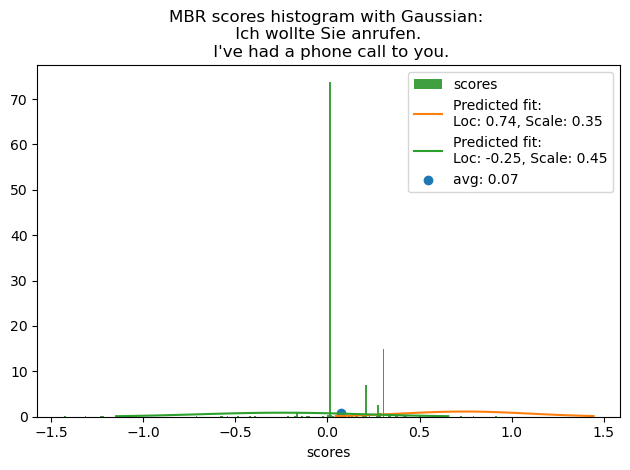

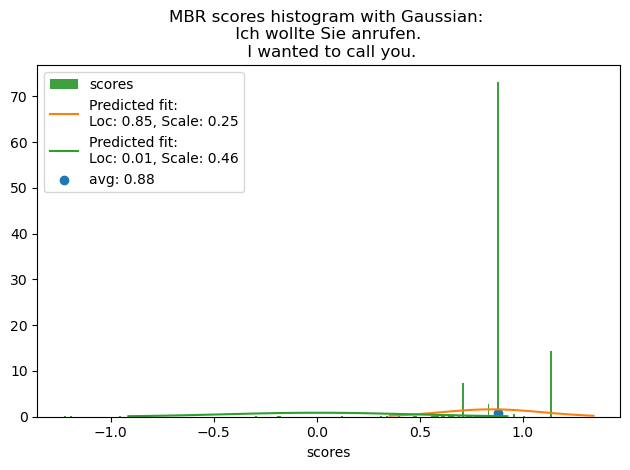

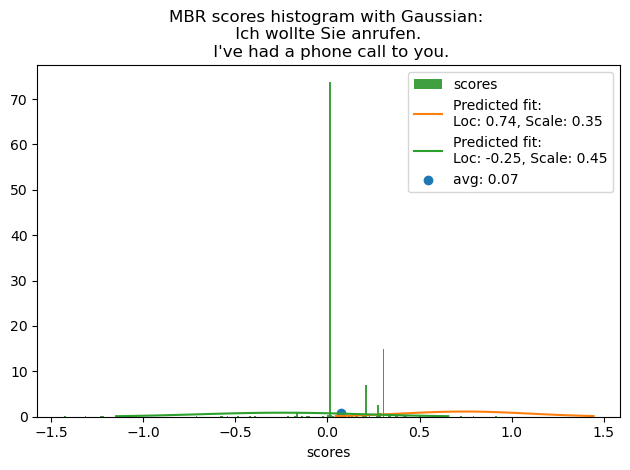

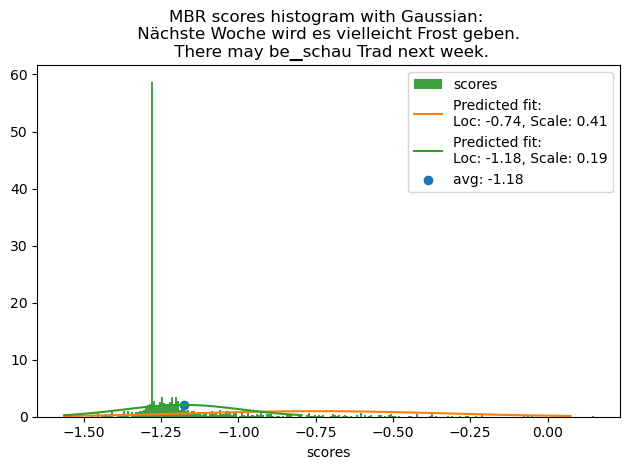

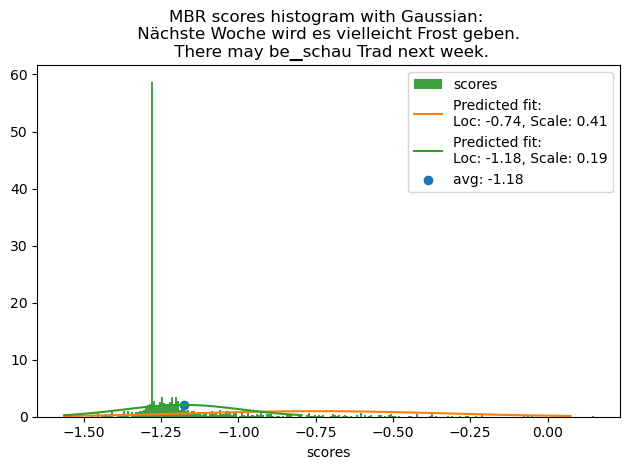

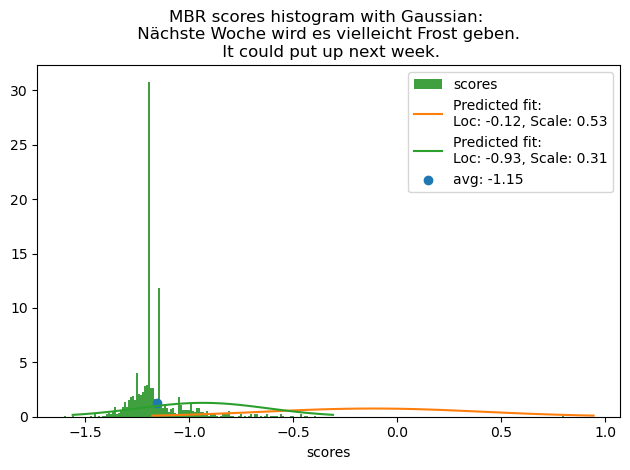

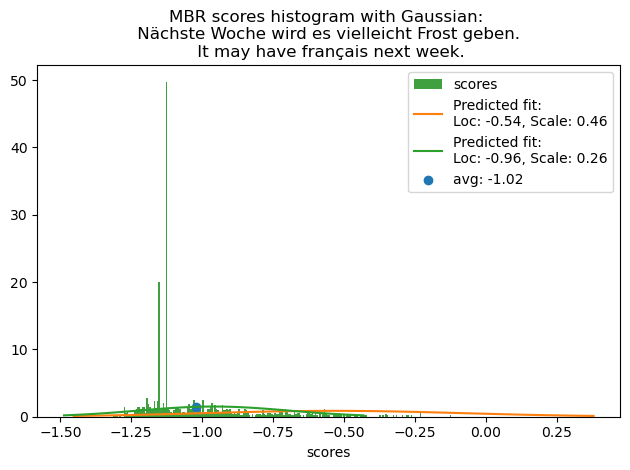

In [21]:
def compare_data_with_fit(data, fit, n_sources=5, n_hypotheses=4, seed=1):
    np.random.seed(seed)
    indices = np.random.choice(len(fit), size=n_sources)
    
    
    for i in indices:
        entry = data.iloc[i]
        repeated_utils = get_repeated_utils(entry["utilities"], entry["utilities_count"])
        hypotheses_indices = np.random.choice(len(entry["utilities"]), size=n_hypotheses)
        for hypothesis_index in hypotheses_indices:
            hypothesis = entry["hypotheses"][hypothesis_index]
            target = entry["target"]
            source = entry["source"]

            utils = repeated_utils[hypothesis_index]
            
            loc = fit[i]["loc"][hypothesis_index].tolist()
            scale = fit[i]["scale"][hypothesis_index].tolist()

            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./test_imgs/")

compare_data_with_fit(dataset.data, all_model_out, )      


In [22]:
#train dataset
dataset_loader = BayesRiskDatasetLoader("train_predictive", n_hypotheses=100, n_references=1000, sampling_method='ancestral')
dataset_train = dataset_loader.load(type="pandas")

tensor([0.7148, 0.2852])


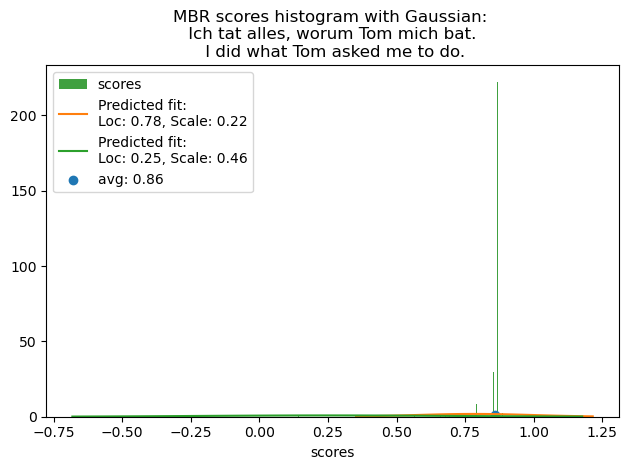

tensor([0.6833, 0.3167])


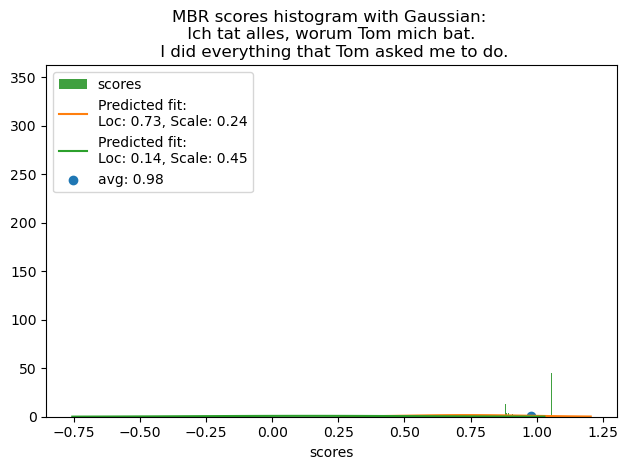

tensor([0.6833, 0.3167])


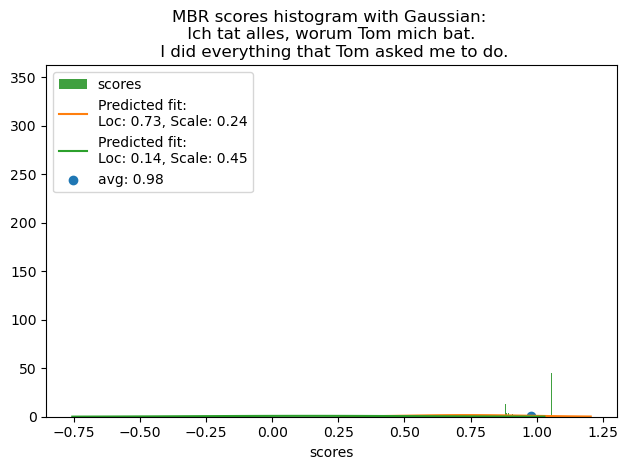

tensor([0.7076, 0.2924])


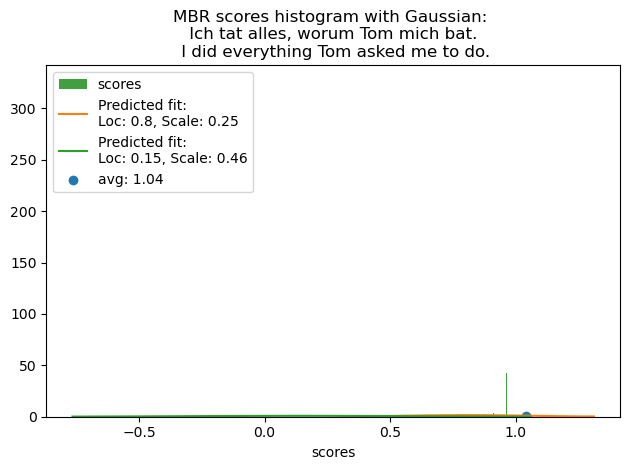

tensor([0.6308, 0.3692])


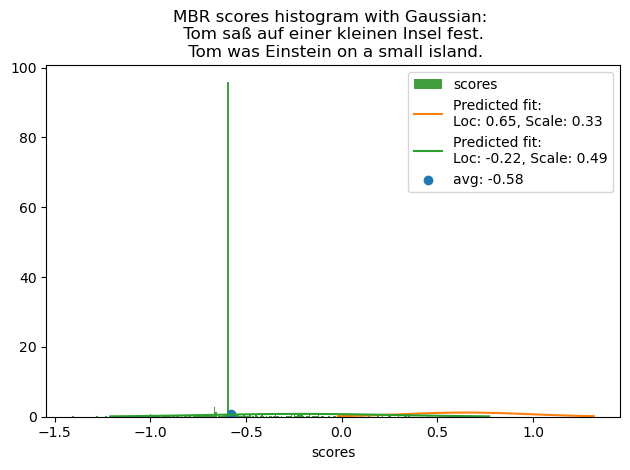

tensor([0.5868, 0.4132])


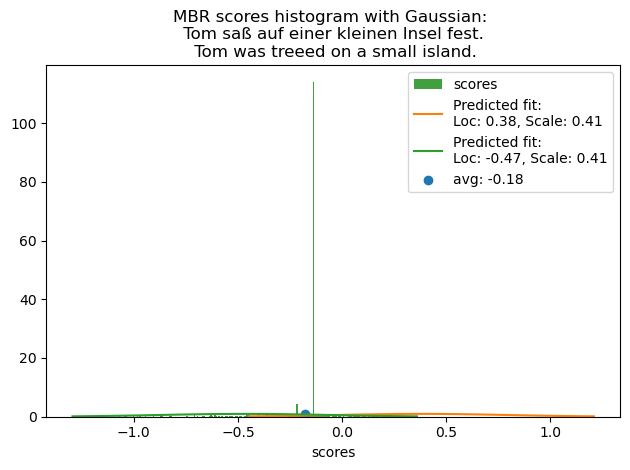

tensor([0.4621, 0.5379])


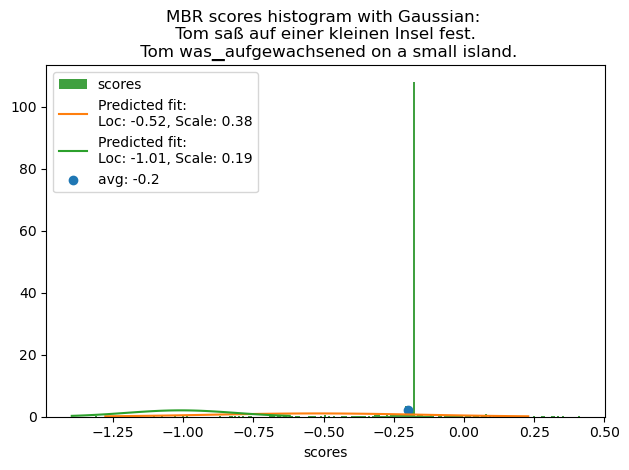

tensor([0.6308, 0.3692])


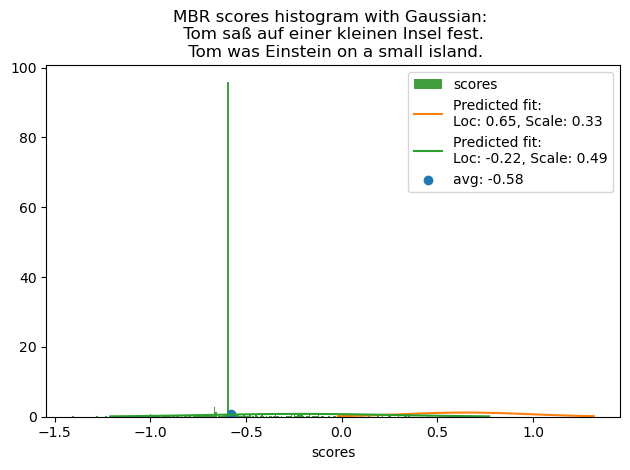

tensor([0.4743, 0.5257])


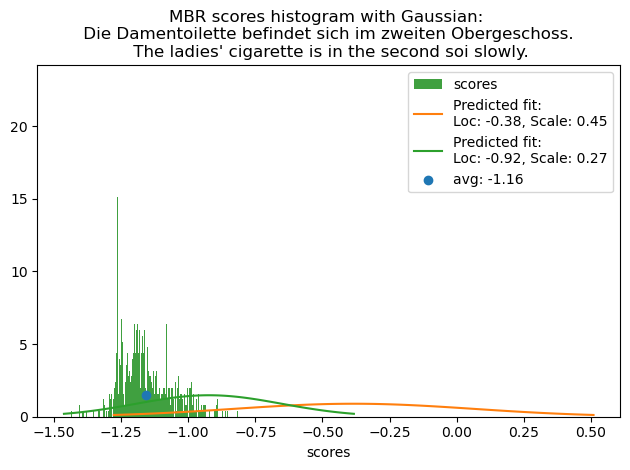

tensor([0.4665, 0.5335])


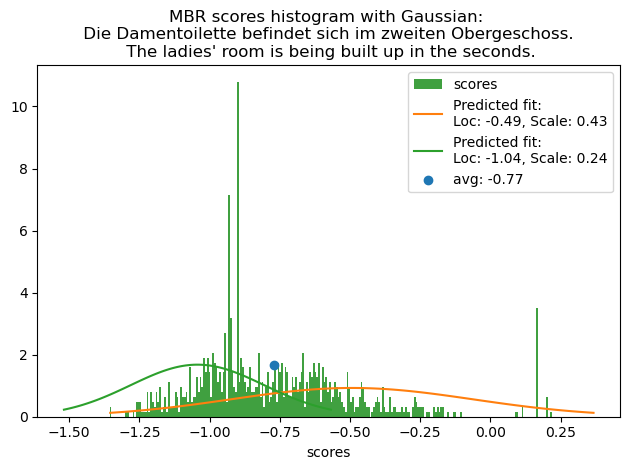

tensor([0.3965, 0.6035])


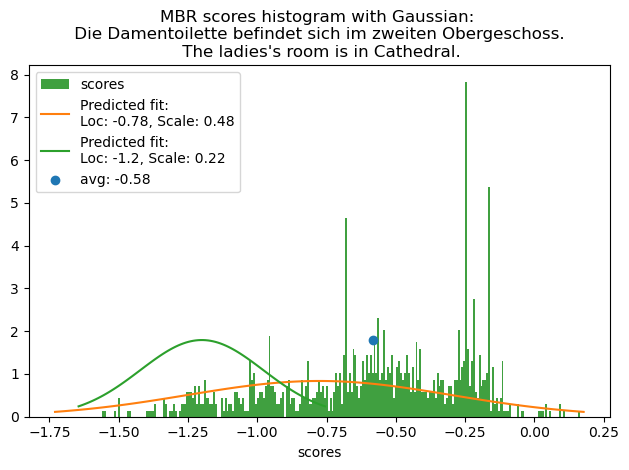

tensor([0.4890, 0.5110])


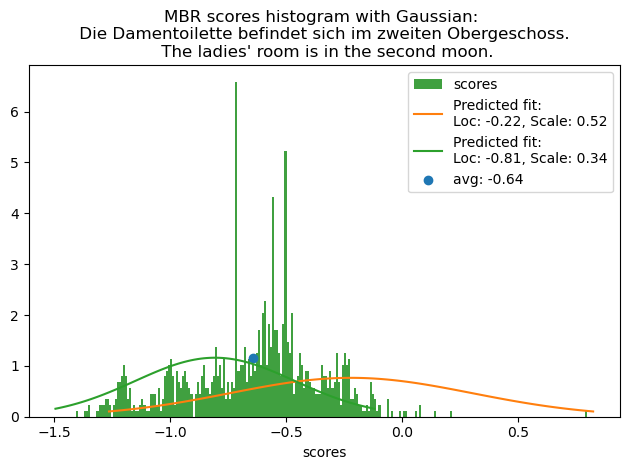

tensor([0.6255, 0.3745])


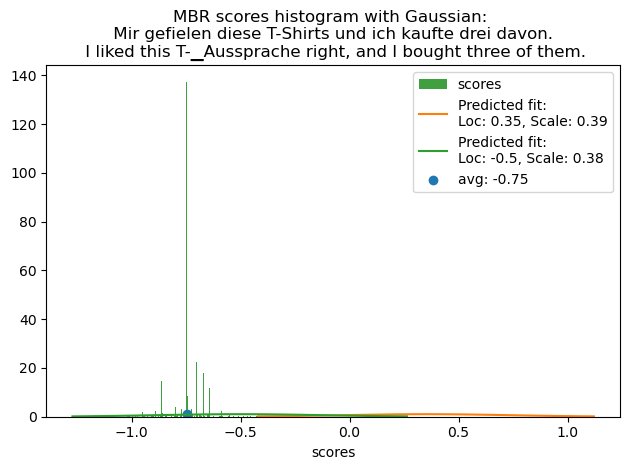

tensor([0.6224, 0.3776])


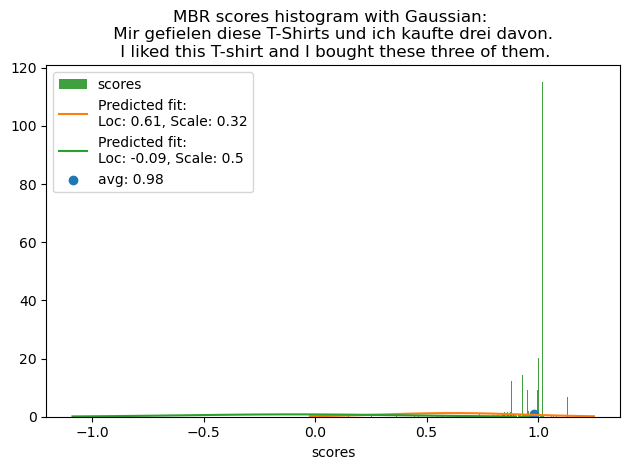

tensor([0.7438, 0.2562])


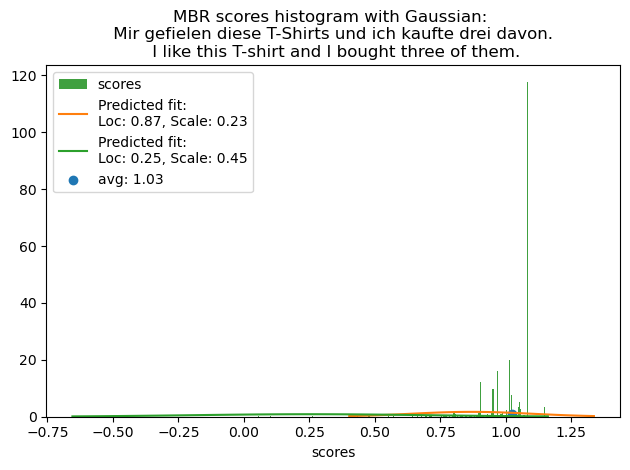

tensor([0.6760, 0.3240])


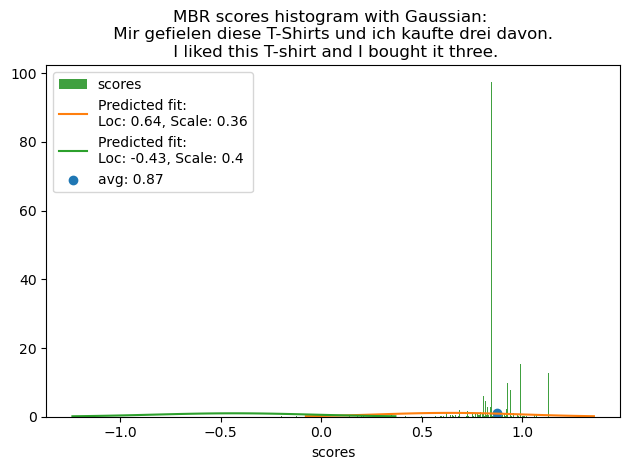

tensor([0.4212, 0.5788])


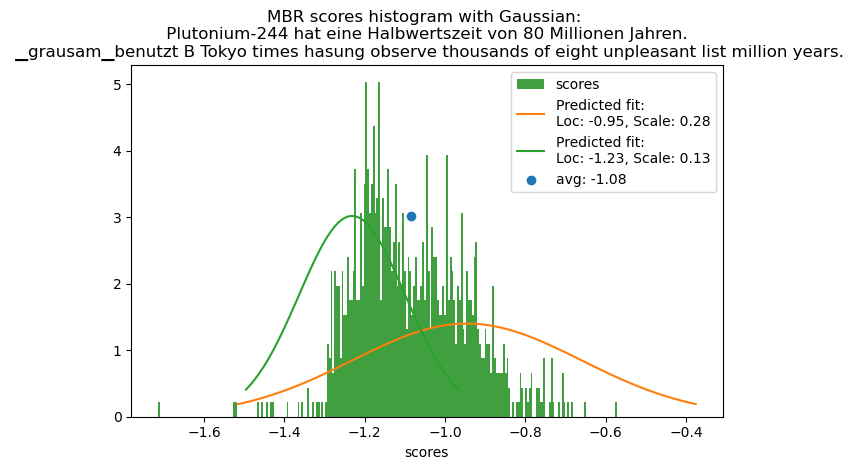

tensor([0.4529, 0.5471])


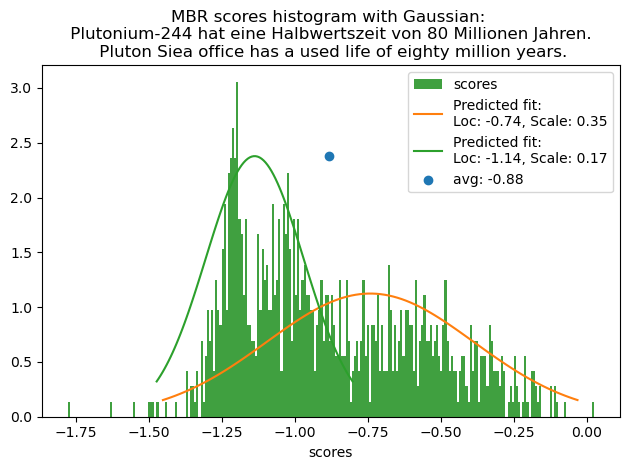

tensor([0.3590, 0.6410])


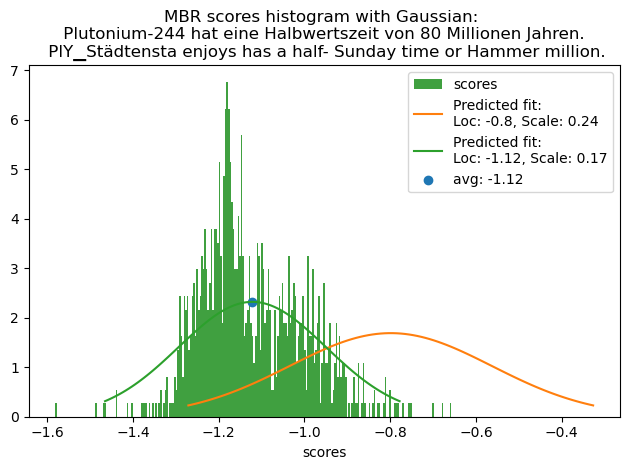

tensor([0.3775, 0.6225])


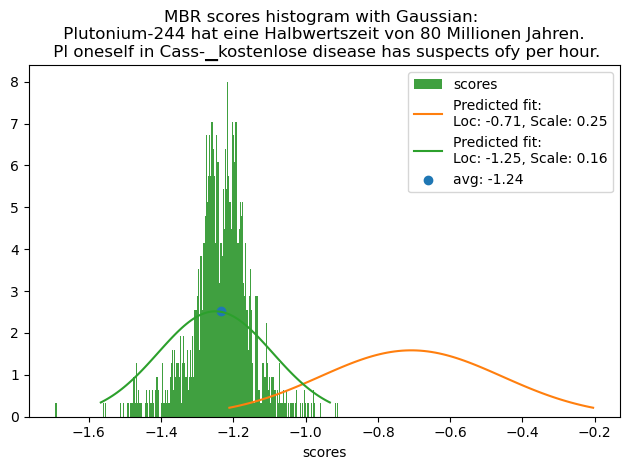

In [23]:
def compare_data_on_model(df, model, n_sources=5, n_hypotheses=4, seed=1):
    
    np.random.seed(seed)
    indices = np.random.choice(len(df["utilities"]), size=n_sources)
    
    for i in indices:
        row = df.iloc[i]
        source = row["source"]
        target = row["target"]
        hypotheses = list(row["hypotheses"])
        repeated_utils = get_repeated_utils(row["utilities"], row["utilities_count"])
        model_out = wrapped_model.get_model_out([source]* len(hypotheses), hypotheses)
        
        hypothesis_indices = np.random.choice(len(hypotheses), size=n_hypotheses)
        
        for h_i in hypothesis_indices:
            loc = model_out['loc'][h_i].tolist()
            scale = model_out['scale'][h_i].tolist()
            
            utils = repeated_utils[h_i]
            hypothesis = hypotheses[h_i]
             

            print(torch.softmax(model_out['logits'][h_i], dim=0))
            show_gaussian_mix(loc, scale, utils, source, target, hypothesis, save=True, path="./train_imgs/")

        
    


compare_data_on_model(dataset_train.data, wrapped_model)    